## imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/vipul/opt/anaconda3/envs/ml/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from PIL import Image
import itertools

In [3]:
!ls ../data/dogs-vs-cats/

test  train valid


In [4]:
train_path = "../data/dogs-vs-cats/train"
valid_path = "../data/dogs-vs-cats/valid"
test_path = "../data/dogs-vs-cats/test"

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)

Found 82 images belonging to 2 classes.


In [6]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'],batch_size=5)

Found 20 images belonging to 2 classes.


In [7]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'],batch_size=11,shuffle=False)

Found 24 images belonging to 2 classes.


In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(40,40))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow((img * 255).astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
imgs, labels = next(train_batches)

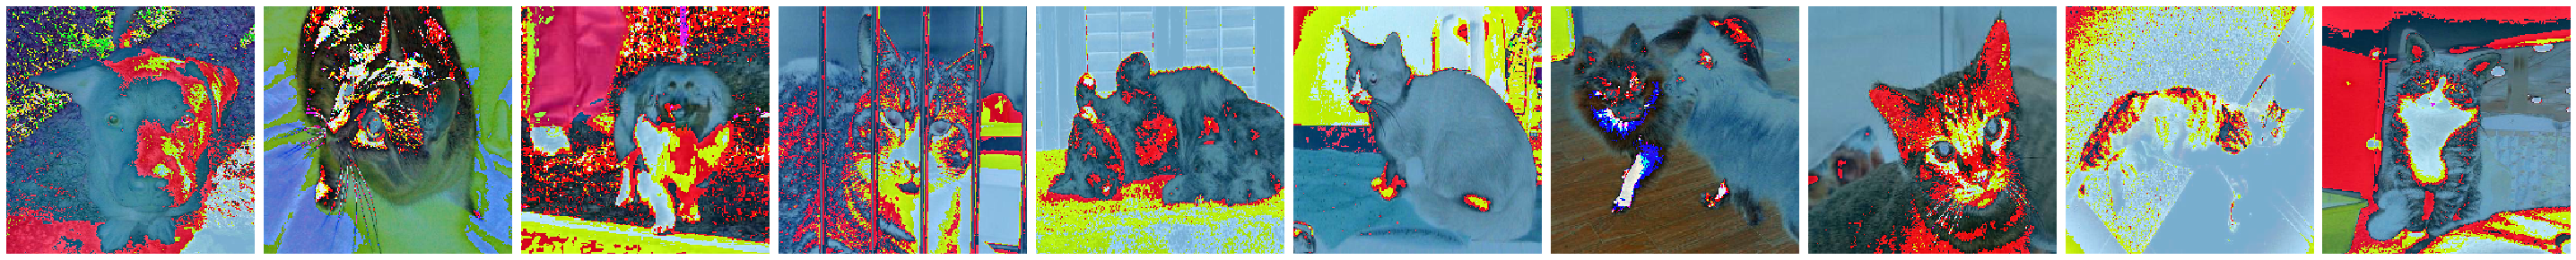

(None,
 array([[0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32))

In [10]:
plotImages(imgs), labels

### Build and train CNN model

In [11]:
model = Sequential([
    Conv2D(32, kernel_size =(3,3), activation='relu', input_shape = (224,224,3)),
    Flatten(),
    Dense(2, activation='softmax') 
])

In [12]:
model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
# fir the data batch by batch
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=True)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
4/4 [==============================] - 1s 197ms/step - loss: 6908.2944 - accuracy: 0.5312 - val_loss: 1023.3989 - val_accuracy: 0.6000
Epoch 2/5
4/4 [==============================] - 1s 134ms/step - loss: 2049.0171 - accuracy: 0.4250 - val_loss: 2034.7598 - val_accuracy: 0.5500
Epoch 3/5
4/4 [==============================] - 1s 150ms/step - loss: 2309.4810 - accuracy: 0.5500 - val_loss: 862.6367 - val_accuracy: 0.5000
Epoch 4/5
4/4 [==============================] - 1s 148ms/step - loss: 1085.6956 - accuracy: 0.7500 - val_loss: 761.3558 - val_accuracy: 0.5000
Epoch 5/5
4/4 [==============================] - 1s 150ms/step - loss: 362.0330 - accuracy: 0.8250 - val_loss: 936.3544 - val_accuracy: 0.5000


### Predict

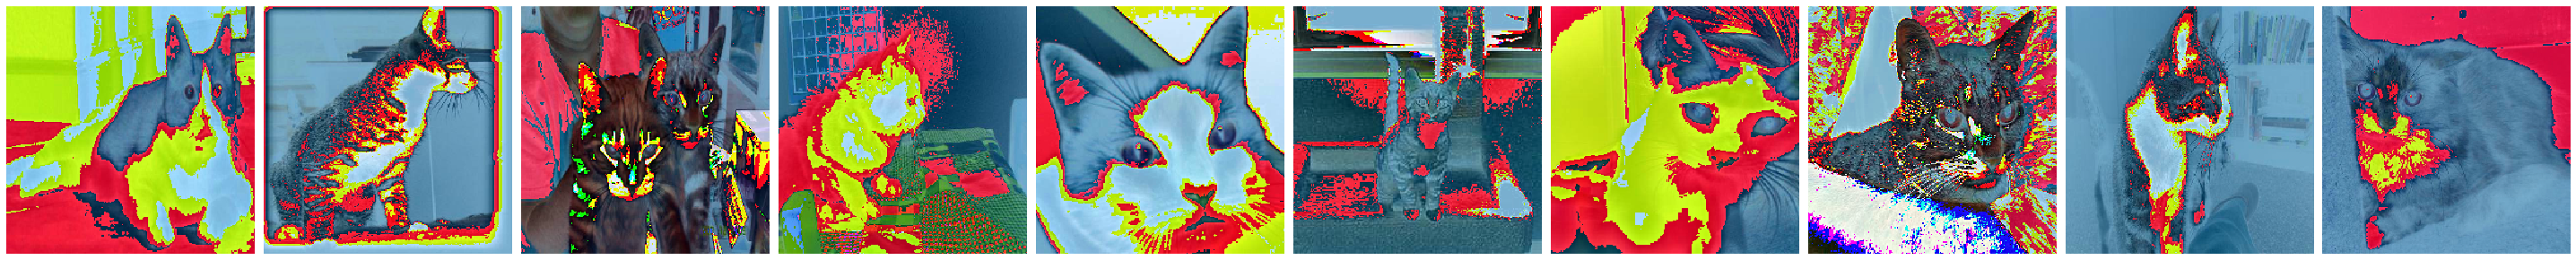

(None,
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32))

In [14]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs),test_labels

In [15]:
test_labels = test_labels[:,0]

In [16]:
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [17]:
predictions = model.predict(test_batches, verbose=True)

3/3 [==============================] - 0s 24ms/step


In [18]:
predictions

array([[0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [2.5603251e-06, 9.9999750e-01],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [21]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization
[[3 9]
 [4 8]]


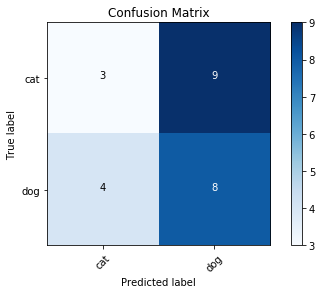

In [22]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### VGG16

In [23]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
type(vgg16_model) # model of functional API and not Sequential

tensorflow.python.keras.engine.training.Model

The last layer has 1000 nodes but we need to change it to 2 , since we need only cats and dogs

In [26]:
model = Sequential()
for layer in vgg16_model.layers[:-1]: # add all except the last layer
    model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [28]:
for layer in model.layers:
    layer.trainable = False # freeze the weights for all the layers

In [29]:
model.add(Dense(units=2 , activation='softmax')) #add new layer for cats and dogs

In [30]:
model.summary() # last layer has changed compared to vgg16, also note trainable and non-trainable params

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Train fine tuned VGG16 model

In [31]:
model.compile(optimizer=Adam(lr = 0.001) , loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=5, verbose=True)

Epoch 1/5
4/4 [==============================] - 12s 3s/step - loss: 1.0557 - accuracy: 0.4750 - val_loss: 0.3599 - val_accuracy: 0.8500
Epoch 2/5
4/4 [==============================] - 12s 3s/step - loss: 0.1227 - accuracy: 0.9750 - val_loss: 0.1805 - val_accuracy: 0.9500
Epoch 3/5
4/4 [==============================] - 12s 3s/step - loss: 0.1298 - accuracy: 0.9750 - val_loss: 0.0566 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 10s 3s/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 12s 3s/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 1.0000


### Predict using fine tuned VGG16 model

In [33]:
predictions = model.predict(test_batches , verbose=True)

3/3 [==============================] - 3s 1s/step


In [34]:
cm = confusion_matrix(y_true=test_batches.classes , y_pred= np.argmax(predictions , axis=1))

In [35]:
cm_plot_labels = ['cat', 'dog']

Confusion matrix, without normalization
[[12  0]
 [ 0 12]]


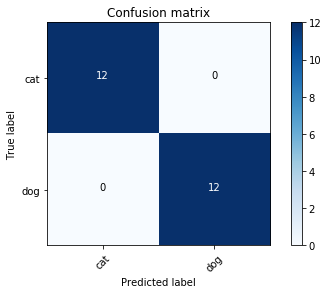

In [36]:
plot_confusion_matrix(cm=cm , classes= cm_plot_labels , title='Confusion matrix')

In [37]:
model.save('../models/vgg16_cat_dogs.h5')